---

# **Convolutional Neural Networks (CNNs)**

### **Introduction to Convoluted Neural Networks**

- #### **Convoluted Neural Network**

  - **Convolutional Neural Network (CNN)**:
    - CNNs are designed to automatically and adaptively learn spatial hierarchies of features through backpropagation. They excel in image classification and segmentation by learning multi-level features and classifiers jointly, outperforming traditional methods.
    - ![Convolutional Neural Networks (CNNs)](<./Images/CNN%20(1).png>)
  - ### **Basic Architecture of CNN**
    - CNNs generally consist of convolutional layers, activation functions, pooling layers, and fully connected layers, which work together to process and classify image data.
    - ![Convolutional Neural Networks (CNNs)](<./Images/CNN%20(2).png>)
  - ### **CNN- Components**

    - **There are four main components in the CNN:**

      1. **Convolution**:
         - **Purpose**: Extract features from the input image.
         - ![Convolutional Neural Networks (CNNs)](<./Images/CNN%20(4).png>)
         - **Parameters**:
           - **Depth**: Number of filters (kernels) used.
           - **Stride**: Number of pixels the filter moves over the input matrix.
           - **Zero-padding**: Padding around the borders of the input matrix to apply the filter on border elements.
         - **Types**: With zero padding (wide convolution) and without zero padding (narrow convolution).
      2. **Non-Linearity(ReLU)**

         - Replaces all negative pixel values in the feature map by zero.
         - The purpose of ReLU (Rectified Linear Unit) is to introduce non-linearity in CNN, since most of the real world data would be non - linear.
         - Other non - linear functions such as tanh(-1,1) or sigmoid (0,1) can also be used instead of ReLU(0,input)
           - ![Convolutional Neural Networks (CNNs)](<./Images/CNN%20(5).png>)

      3. **Pooling or Sub-Sampling**

         - **Purpose**: Reduce dimensionality while retaining important features.
         - **Types**: Max pooling, average pooling, sum pooling.
           - **Max**
           - **Average**
           - **Sum**
           - **etc**
             - ![Convolutional Neural Networks (CNNs)](<./Images/CNN%20(6).png>)

      4. **Classification (Fully Connected Layer)**
         - Converts the output from the previous layers into class scores.
         - ![Convolutional Neural Networks (CNNs)](<./Images/CNN%20(7).png>)

    - ### **Input**
      - ![Convolutional Neural Networks (CNNs)](<./Images/CNN%20(3).png>)
        - **An image is a matrix of pixel values.**
        - **If we consider a grayscale image, the value of each pixel in the matrix will range from 0 to 255.**
        - **RGB Image**: Matrix with combined R, G, and B values per pixel.
---
## **2. Project -- MNIST Handwriting Recognition using Convoluted Neural Network - Python implementation**

#### **Importing of libraries**


In [2]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils import data
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

#### **Load Data**

In [3]:
mnist_train = MNIST(root='mnist', train=True, download=True, transform=ToTensor())
mnist_test = MNIST(root='mnist', train=False, download=True, transform=ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting mnist\MNIST\raw\train-images-idx3-ubyte.gz to mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting mnist\MNIST\raw\train-labels-idx1-ubyte.gz to mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to mnist\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist\MNIST\raw



### **For cmap=' '**
<details>
  <summary>Click to expand!</summary>
 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
 </details>

#### **Display Sample Images**

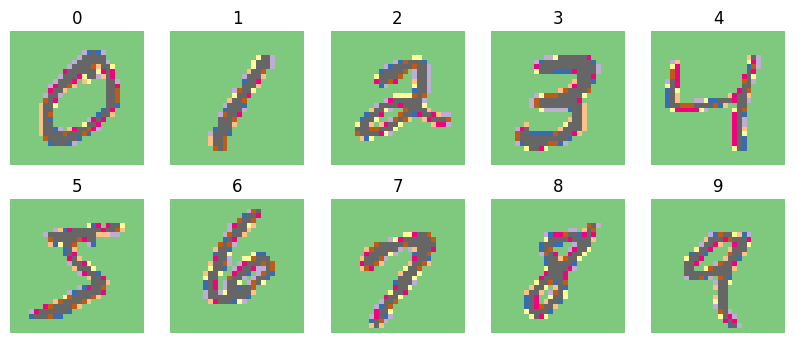

In [4]:
examples = []
for target in range(10):
    for img, label in mnist_train:
        if target == label:
            examples.append(img)
            break

fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for label, img in enumerate(examples):
    col = label % 5
    row = label // 5
    ax[row, col].imshow(img.squeeze(), cmap='Accent')
    ax[row, col].set_title(f'{label}')
    ax[row, col].axis('off')

#### **Check Image Tensor Shape**

In [5]:
img, label = mnist_train[0]
print('Shape of the image tensor', img.shape)

Shape of the image tensor torch.Size([1, 28, 28])


#### **Implement CNN**

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

#### **Train CNN**

In [8]:
device = 'cpu'
cnn = CNN().to(device)

epochs = 10
batch_size = 300

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

train_loader = data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    epoch_loss = 0.0
    for imgs, labels in train_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = cnn(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.detach().cpu().item()

    print(f'Loss ({epoch+1}/{epochs}): {epoch_loss:.3f}')

Loss (1/10): 113.588
Loss (2/10): 29.751
Loss (3/10): 18.526
Loss (4/10): 14.588
Loss (5/10): 12.080
Loss (6/10): 10.600
Loss (7/10): 9.687
Loss (8/10): 8.761
Loss (9/10): 8.085
Loss (10/10): 7.509


#### **Evaluate CNN**

In [13]:
from sklearn.metrics import confusion_matrix, f1_score

cnn.eval()
labels_true = []
labels_pred = []

test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)
for imgs, labels in test_loader:
    imgs = imgs.to(device)
    labels = labels.to(device)

    outputs = cnn(imgs)
    _, predicted = torch.max(outputs.data, 1)

    labels_true.extend(labels.cpu().tolist())
    labels_pred.extend(predicted.cpu().tolist())

confusion_mat = confusion_matrix(labels_true, labels_pred)
f1 = f1_score(labels_true, labels_pred, average='micro')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(confusion_mat)

F1 Score: 0.9864
Confusion Matrix:
[[ 974    0    1    0    1    0    1    1    2    0]
 [   0 1130    4    0    1    0    0    0    0    0]
 [   1    1 1025    0    1    0    0    2    2    0]
 [   1    0    0  999    0    6    0    1    3    0]
 [   0    0    0    0  978    0    1    0    2    1]
 [   2    0    1    4    0  880    2    0    2    1]
 [   5    2    0    0    2    1  943    0    5    0]
 [   0    3   15    2    0    1    0  998    3    6]
 [   4    0    3    1    3    2    0    1  958    2]
 [   2    4    0    0   13    5    0    4    2  979]]


**The F1 Score of 0.9864 highlights exceptional classification performance, reflecting the model's high accuracy across all classes.**

---